In [1]:
import pandas as pd
import numpy as np
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import requests
from io import BytesIO
from PIL import Image
import time
import pickle
import streamlit as st
import requests
import cv2
import time
from io import BytesIO
from urllib import request
import urllib

In [2]:
ratings = pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movies = movies[['id', 'original_title', 'genres', 'release_date', 'popularity']]
movies = movies.rename(columns={'id':'movieId'})

In [4]:
movies

,movieId,original_title,genres,release_date,popularity
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,21.946943
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,17.015539
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,11.7129
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,3.859495
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,8.387519
...,...,...,...,...,...
45461,439050,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,0.072051
45462,111109,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",2011-11-17,0.178241
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",2003-08-01,0.903007
45464,227506,Satana likuyushchiy,[],1917-10-21,0.003503


In [5]:
movies = movies.loc[movies['popularity'] != 'Beware Of Frost Bites']

In [6]:
movies['popularity'] = movies['popularity']*1000

C:\Users\Admin\AppData\Local\Temp/ipykernel_15268/3027007150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = movies['popularity']*1000


In [7]:
movies['popularity'].astype('int64', errors='ignore')

0                                                21946.943
1                                                17015.539
2                                                  11712.9
3                                                 3859.495
4                                                 8387.519
                               ...                        
45461    0.0720510.0720510.0720510.0720510.0720510.0720...
45462    0.1782410.1782410.1782410.1782410.1782410.1782...
45463    0.9030070.9030070.9030070.9030070.9030070.9030...
45464    0.0035030.0035030.0035030.0035030.0035030.0035...
45465    0.1630150.1630150.1630150.1630150.1630150.1630...
Name: popularity, Length: 45465, dtype: object

In [8]:
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

C:\Users\Admin\AppData\Local\Temp/ipykernel_15268/1678810987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')


In [9]:
movies['popularity'] = movies['popularity'].dropna(axis = 0)

C:\Users\Admin\AppData\Local\Temp/ipykernel_15268/1977160213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['popularity'] = movies['popularity'].dropna(axis = 0)


In [10]:
movies = movies.loc[movies['popularity'] > 15000].sort_values(['popularity'], ascending = False)

In [11]:
movies.reset_index(drop=True, inplace = True)

In [12]:
ratings = ratings[['userId', 'movieId', 'rating']]

In [13]:
movies.movieId = pd.to_numeric(movies.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')

In [14]:
def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list

In [15]:
def fetch_poster(movie_id): 
    url = 'https://api.themoviedb.org/3/movie/{}?api_key=998ed7e9607d5b520d853548696e8ae2'.format(movie_id)
    data = requests.get(url)
    data = data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path

In [16]:
def final_show(movie_id):
    for i in movie_id:
        try:
            url = fetch_poster(i)
            req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
            res = request.urlopen(req).read()
            urlopen_img = Image.open(BytesIO(res))
            plt.imshow(urlopen_img) ## 이미지 출력
            plt.axis('off') ## 축 제거
            plt.show()
            print(movies.loc[movies['movieId'] == i,:]['original_title'].values[0])
            print('=======================')
        except Exception:
            image_path = './Images/none_image.jpg'
            image = img.imread(image_path) ## RGB 값
            plt.imshow(image) ## 이미지 출력
            plt.axis('off') ## 축 제거
            plt.show()
            print(movies.loc[movies['movieId'] == i,:]['original_title'].values[0])
            print('=======================')

In [17]:
movies['genres'] = movies['genres'].apply(parse_genres)

In [18]:
data = pd.merge(ratings, movies, on='movieId', how='inner')

In [19]:
data['popularity'] = data['popularity'].astype('float64')

In [20]:
data = data.sort_values(['popularity'], ascending = False)

In [21]:
matrix = data.pivot_table(index='userId', columns='original_title', values='rating')

In [22]:
matrix.fillna(0, inplace=True)

In [23]:
# 기존유저

GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(userId, matrix, n, similar_genre=True):
    input_genres = movies[movies['original_title'] == data.loc[data['userId']==1]['original_title'].tolist()[0]]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == data.loc[data['userId']==1]['original_title'].tolist()[0]:
            continue

        # rating comparison
        cor = pearsonR(matrix[data.loc[data['userId']==1]['original_title'].tolist()[0]], matrix[title])
        
        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = movies[movies['original_title'] == title]['genres'].iloc(0)[0]
            
            rating = data.loc[data['original_title'] == title]['rating'].values
            rating_result = np.mean(rating)
            
            movieid = movies.loc[movies['original_title'] == title]['movieId'].values
            
            popularity = movies.loc[movies['original_title'] == title]['popularity'].values
            
            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)
            
        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres, rating_result, movieid, popularity))
            
    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]

In [24]:
# 기존유저 결과값 출력

recommend_existing_result = recommend(1, matrix, 10, similar_genre=True)

pd.DataFrame(recommend_existing_result, columns = ['Title', 'Correlation', 'Genre', 'rating', 'movie_id', 'popularity'])

,Title,Correlation,Genre,rating,movie_id,popularity
0,Sister Act,0.46,"[Music, Comedy]",3.676471,[2005],[18830.649999999998]
1,Harry Potter and the Goblet of Fire,0.45,"[Adventure, Fantasy, Family]",2.690476,[674],[24903.058]
2,While You Were Sleeping,0.44,"[Comedy, Drama, Romance]",4.392857,[2064],[15783.615]
3,Bandidas,0.35,"[Action, Comedy, Western, Crime]",2.687500,[1969],[19294.832]
4,Bill & Ted's Excellent Adventure,0.35,"[Adventure, Comedy, Science Fiction]",3.166667,[1648],[15109.261]
5,The Woman in Red,0.35,"[Comedy, Romance]",3.500000,[5968],[19856.024999999998]
6,Forrest Gump,0.34,"[Comedy, Drama, Romance]",3.944444,[13],[48307.194]
7,"Monsters, Inc.",0.33,"[Animation, Comedy, Family]",3.073171,[585],[26419.962000000003]
8,Jackie Brown,0.32,"[Comedy, Crime, Romance]",4.500000,[184],[16415.498]
9,School of Rock,0.30,"[Comedy, Music]",3.728261,[1584],[17951.42]


In [25]:
recommend_existing_result2 = []

for i in range(10):
    recommend_existing_result2.append(int(recommend_existing_result[i][4][0]))

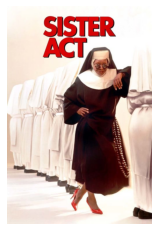

Sister Act


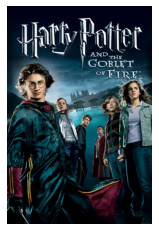

Harry Potter and the Goblet of Fire


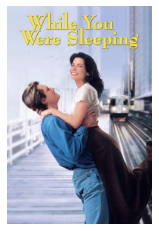

While You Were Sleeping


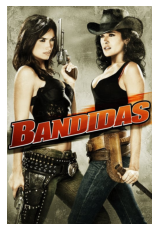

Bandidas


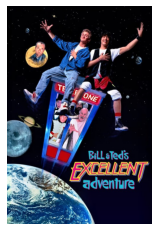

Bill & Ted's Excellent Adventure


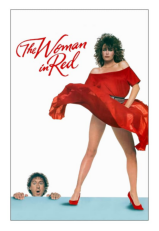

The Woman in Red


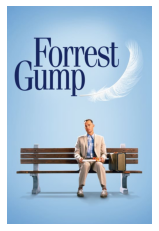

Forrest Gump


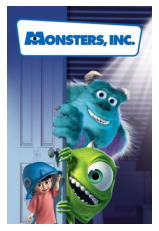

Monsters, Inc.


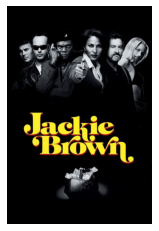

Jackie Brown


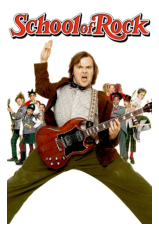

School of Rock


In [26]:
final_show(recommend_existing_result2)